<left><font size="6">**Etude de Marché**

<left><font size="3">**Scénario :**

Votre entreprise d'agroalimentaire souhaite se développer à l'international. Elle est spécialisée dans...le poulet !

L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

Votre objectif sera d'aider à cibler plus particulièrement certains pays, dans le but d'approfondir ensuite l'étude de marché. Plus particulièrement, l'idéal serait de produire des "groupes" de pays, plus ou moins gros, dont on connaît les caractéristiques.

Dans un premier temps, la stratégie est plutôt d'exporter les produits plutôt que de produire sur place, c'est-à-dire dans le(s) nouveau(x) pays ciblé(s).

# Préparation des données 

## Dataframe principale : dispo_alim 

In [1]:
import pandas as pd
import numpy as np
dispo_alim=pd.read_csv("fichier 1.csv", sep=";")
dispo_alim.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2903,Produits Vegetaux,2017,2017,Kcal/personne/jour,1855.00,Fc,Donnée calculée
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2903,Produits Vegetaux,2017,2017,g/personne/jour,45.02,Fc,Donnée calculée
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,195.00,Fc,Donnée calculée
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2017,2017,g/personne/jour,11.14,Fc,Donnée calculée
4,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,664,Disponibilité alimentaire (Kcal/personne/jour),2903,Produits Vegetaux,2017,2017,Kcal/personne/jour,2470.00,Fc,Donnée calculée


In [2]:
dispo_alim=dispo_alim.loc[:,["Zone","Élément","Produit","Valeur"]]
dispo_alim

,Zone,Élément,Produit,Valeur
0,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Produits Vegetaux,1855.00
1,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Produits Vegetaux,45.02
2,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Produits Animaux,195.00
3,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Produits Animaux,11.14
4,Afrique du Sud,Disponibilité alimentaire (Kcal/personne/jour),Produits Vegetaux,2470.00
...,...,...,...,...
687,Zambie,Disponibilité de protéines en quantité (g/pers...,Produits Animaux,12.03
688,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Produits Vegetaux,1736.00
689,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Produits Vegetaux,32.61
690,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Produits Animaux,155.00


In [3]:
dispo_alim=dispo_alim.pivot_table('Valeur',['Zone','Produit'],'Élément').reset_index()
dispo_alim

Élément,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,Produits Animaux,195.0,11.14
1,Afghanistan,Produits Vegetaux,1855.0,45.02
2,Afrique du Sud,Produits Animaux,465.0,35.29
3,Afrique du Sud,Produits Vegetaux,2470.0,48.35
4,Albanie,Produits Animaux,1043.0,64.08
...,...,...,...,...
341,États-Unis d'Amérique,Produits Vegetaux,2753.0,39.94
342,Éthiopie,Produits Animaux,103.0,6.62
343,Éthiopie,Produits Vegetaux,2231.0,59.64
344,Îles Salomon,Produits Animaux,198.0,15.72


In [4]:
dispo_alim=dispo_alim.pivot_table(["Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)"],'Zone','Produit',aggfunc=np.sum, margins=True, margins_name="Total").reset_index()
dispo_alim

Élément                   Zone Disponibilité alimentaire (Kcal/personne/jour)  \
Produit                                                      Produits Animaux   
0                  Afghanistan                                          195.0   
1               Afrique du Sud                                          465.0   
2                      Albanie                                         1043.0   
3                      Algérie                                          421.0   
4                    Allemagne                                         1070.0   
..                         ...                                            ...   
169                   Équateur                                          528.0   
170      États-Unis d'Amérique                                         1026.0   
171                   Éthiopie                                          103.0   
172               Îles Salomon                                          198.0   
173                      Total                                        97945.0   

Élément                              \
Produit Produits Vegetaux     Total   
0                  1855.0    2050.0   
1                  2470.0    2935.0   
2                  2347.0    3390.0   
3                  2921.0    3342.0   
4                  2472.0    3542.0   
..                    ...       ...   
169                2071.0    2599.0   
170                2753.0    3779.0   
171                2231.0    2334.0   
172                2208.0    2406.0   
173              398600.0  496545.0   

Élément Disponibilité de protéines en quantité (g/personne/jour)  \
Produit                                         Produits Animaux   
0                                                    11.14         
1                                                    35.29         
2                                                    64.08         
3                                                    26.71         
4                                                    62.77         
..                                                     ...         
169                                                  30.84         
170                                                  73.30         
171                                                   6.62         
172                                                  15.72         
173                                                6437.60         

Élément                              
Produit Produits Vegetaux     Total  
0                   45.02     56.16  
1                   48.35     83.64  
2                   54.09    118.17  
3                   66.11     92.82  
4                   41.29    104.06  
..                    ...       ...  
169                 35.62     66.46  
170                 39.94    113.24  
171                 59.64     66.26  
172                 37.74     53.46  
173               7738.24  14175.84  

[174 rows x 7 columns]

In [5]:
dispo_alim["Proportion de protéines animales (en %)"]=dispo_alim["Disponibilité de protéines en quantité (g/personne/jour)","Produits Animaux"]/dispo_alim["Disponibilité de protéines en quantité (g/personne/jour)","Total"]*100
dispo_alim

Élément                   Zone Disponibilité alimentaire (Kcal/personne/jour)  \
Produit                                                      Produits Animaux   
0                  Afghanistan                                          195.0   
1               Afrique du Sud                                          465.0   
2                      Albanie                                         1043.0   
3                      Algérie                                          421.0   
4                    Allemagne                                         1070.0   
..                         ...                                            ...   
169                   Équateur                                          528.0   
170      États-Unis d'Amérique                                         1026.0   
171                   Éthiopie                                          103.0   
172               Îles Salomon                                          198.0   
173                      Total                                        97945.0   

Élément                              \
Produit Produits Vegetaux     Total   
0                  1855.0    2050.0   
1                  2470.0    2935.0   
2                  2347.0    3390.0   
3                  2921.0    3342.0   
4                  2472.0    3542.0   
..                    ...       ...   
169                2071.0    2599.0   
170                2753.0    3779.0   
171                2231.0    2334.0   
172                2208.0    2406.0   
173              398600.0  496545.0   

Élément Disponibilité de protéines en quantité (g/personne/jour)  \
Produit                                         Produits Animaux   
0                                                    11.14         
1                                                    35.29         
2                                                    64.08         
3                                                    26.71         
4                                                    62.77         
..                                                     ...         
169                                                  30.84         
170                                                  73.30         
171                                                   6.62         
172                                                  15.72         
173                                                6437.60         

Élément                             Proportion de protéines animales (en %)  
Produit Produits Vegetaux     Total                                          
0                   45.02     56.16                               19.836182  
1                   48.35     83.64                               42.192731  
2                   54.09    118.17                               54.226961  
3                   66.11     92.82                               28.776126  
4                   41.29    104.06                               60.320969  
..                    ...       ...                                     ...  
169                 35.62     66.46                               46.403852  
170                 39.94    113.24                               64.729777  
171                 59.64     66.26                                9.990945  
172                 37.74     53.46                               29.405163  
173               7738.24  14175.84                               45.412476  

[174 rows x 8 columns]

In [6]:
dispo_alim.columns=dispo_alim.columns.droplevel("Produit")
dispo_alim

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %)
0,Afghanistan,195.0,1855.0,2050.0,11.14,45.02,56.16,19.836182
1,Afrique du Sud,465.0,2470.0,2935.0,35.29,48.35,83.64,42.192731
2,Albanie,1043.0,2347.0,3390.0,64.08,54.09,118.17,54.226961
3,Algérie,421.0,2921.0,3342.0,26.71,66.11,92.82,28.776126
4,Allemagne,1070.0,2472.0,3542.0,62.77,41.29,104.06,60.320969
...,...,...,...,...,...,...,...,...
169,Équateur,528.0,2071.0,2599.0,30.84,35.62,66.46,46.403852
170,États-Unis d'Amérique,1026.0,2753.0,3779.0,73.30,39.94,113.24,64.729777
171,Éthiopie,103.0,2231.0,2334.0,6.62,59.64,66.26,9.990945
172,Îles Salomon,198.0,2208.0,2406.0,15.72,37.74,53.46,29.405163


In [7]:
dispo_alim=dispo_alim.set_index("Zone")
dispo_alim

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %)
Zone,,,,,,,
Afghanistan,195.0,1855.0,2050.0,11.14,45.02,56.16,19.836182
Afrique du Sud,465.0,2470.0,2935.0,35.29,48.35,83.64,42.192731
Albanie,1043.0,2347.0,3390.0,64.08,54.09,118.17,54.226961
Algérie,421.0,2921.0,3342.0,26.71,66.11,92.82,28.776126
Allemagne,1070.0,2472.0,3542.0,62.77,41.29,104.06,60.320969
...,...,...,...,...,...,...,...
Équateur,528.0,2071.0,2599.0,30.84,35.62,66.46,46.403852
États-Unis d'Amérique,1026.0,2753.0,3779.0,73.30,39.94,113.24,64.729777
Éthiopie,103.0,2231.0,2334.0,6.62,59.64,66.26,9.990945


J'obtiens ainsi le dataframe "dispo_alim" suivant qui me servira pour l'analyse.

In [8]:
dispo_alim=dispo_alim.iloc[:,[2,5,6]]
dispo_alim=dispo_alim.drop(dispo_alim.index[-1])
dispo_alim

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %)
Zone,,,
Afghanistan,2050.0,56.16,19.836182
Afrique du Sud,2935.0,83.64,42.192731
Albanie,3390.0,118.17,54.226961
Algérie,3342.0,92.82,28.776126
Allemagne,3542.0,104.06,60.320969
...,...,...,...
Émirats arabes unis,3343.0,112.95,45.630810
Équateur,2599.0,66.46,46.403852
États-Unis d'Amérique,3779.0,113.24,64.729777


## Dataframe population

J'extraie les données de la population de chaque pays pour l'année 2016 et 2017 que je mets dans un dataframe "pop" :

In [9]:
pop=pd.read_csv("population.csv", sep=";")
pop.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,35383.032,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,56207.646,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,2886.438,X,Sources internationales sûres,NaN


In [10]:
pop= pop.loc[:,["Code zone (FAO)","Zone","Année","Valeur","Description du Symbole"]] # séléction des colonnes qui me serviront pour l'analyse

pop.value_counts('Description du Symbole',ascending=False) # Comptabilise chacunes des valeurs prises par la colonne 'Description du Symbole'

A=pop[pop["Description du Symbole"]=="Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées"] # Vérifier quel pays prend la valeur "Agrégat, peut inclure des données officielles, ..."
A

,Code zone (FAO),Zone,Année,Valeur,Description du Symbole
18,151,Antilles néerlandaises (ex),2016,272.693,"Agrégat, peut inclure des données officielles,..."
19,151,Antilles néerlandaises (ex),2017,275.186,"Agrégat, peut inclure des données officielles,..."
82,351,Chine,2016,1445523.929,"Agrégat, peut inclure des données officielles,..."
83,351,Chine,2017,1452625.244,"Agrégat, peut inclure des données officielles,..."


Je supprime la Chine car il y a une redondance :

In [11]:
pop.drop(pop.loc[pop["Zone"]=="Chine"].index, inplace=True) # suppression de la Chine
pop=pop.loc[:,["Zone","Année","Valeur"]] # séléction des colonnes qui me serviront pour l'analyse
pop

,Zone,Année,Valeur
0,Afghanistan,2016,35383.032
1,Afghanistan,2017,36296.113
2,Afrique du Sud,2016,56207.646
3,Afrique du Sud,2017,57009.756
4,Albanie,2016,2886.438
...,...,...,...
469,Yémen,2017,27834.819
470,Zambie,2016,16363.458
471,Zambie,2017,16853.599
472,Zimbabwe,2016,14030.331


In [12]:
pop=pop.pivot_table('Valeur','Zone','Année').reset_index()
pop

Année,Zone,2016,2017
0,Afghanistan,35383.032,36296.113
1,Afrique du Sud,56207.646,57009.756
2,Albanie,2886.438,2884.169
3,Algérie,40551.392,41389.189
4,Allemagne,82193.768,82658.409
...,...,...,...
231,Îles Salomon,619.438,636.039
232,Îles Turques-et-Caïques,36.559,37.115
233,Îles Vierges américaines,104.835,104.751
234,Îles Vierges britanniques,29.355,29.577


In [13]:
pop["Diff pop_2017-2016 (en %)"]=((pop[2017]-pop[2016])/pop[2017])*100
pop

Année,Zone,2016,2017,Diff pop_2017-2016 (en %)
0,Afghanistan,35383.032,36296.113,2.515644
1,Afrique du Sud,56207.646,57009.756,1.406970
2,Albanie,2886.438,2884.169,-0.078671
3,Algérie,40551.392,41389.189,2.024193
4,Allemagne,82193.768,82658.409,0.562122
...,...,...,...,...
231,Îles Salomon,619.438,636.039,2.610060
232,Îles Turques-et-Caïques,36.559,37.115,1.498047
233,Îles Vierges américaines,104.835,104.751,-0.080190
234,Îles Vierges britanniques,29.355,29.577,0.750583


Je sélectionne les colonnes qui m'intéressent pour l'analyse et je renomme le dataframe "pop" en dataframe "croissance_pop" :

In [14]:
croissance_pop=pop.loc[:,["Zone","Diff pop_2017-2016 (en %)"]]
croissance_pop=croissance_pop.set_index("Zone")
croissance_pop

Année,Diff pop_2017-2016 (en %)
Zone,
Afghanistan,2.515644
Afrique du Sud,1.406970
Albanie,-0.078671
Algérie,2.024193
Allemagne,0.562122
...,...
Îles Salomon,2.610060
Îles Turques-et-Caïques,1.498047
Îles Vierges américaines,-0.080190


## Dataframe autosuffisance_poulet 

Afin de déterminer l'autosuffisance en poulet de chaque pays, je crée un dataframe "prod_conso" qui mettra en lumière la production et la consommation de poulet de chaque pays.

In [15]:
prod_conso=pd.read_csv("prod_conso.csv", sep=";")
prod_conso.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1665,Im,Données de la FAO basées sur une méthodologie ...
3,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2118,Im,Données de la FAO basées sur une méthodologie ...
4,FBS,Nouveaux Bilans Alimentaire,3,Albanie,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,13,Im,Données de la FAO basées sur une méthodologie ...


In [16]:
prod_conso=prod_conso.loc[:,["Zone","Élément","Valeur"]]
prod_conso=prod_conso.pivot_table('Valeur','Zone','Élément').reset_index()
prod_conso.replace([np.inf, -np.inf], 0, inplace=True)
prod_conso.replace(np.nan,0, inplace=True)
prod_conso.head()

Élément,Zone,Nourriture,Production
0,Afghanistan,57.0,28.0
1,Afrique du Sud,2118.0,1665.0
2,Albanie,33.0,13.0
3,Algérie,304.0,297.0
4,Allemagne,1492.0,1514.0


On en déduit une colonne "Autosuffisance (en milliers de Tonnes)" à partir des colonnes "Nourriture" et "Production" :

In [17]:
prod_conso["Autosuffisance (en milliers de Tonnes)"]=prod_conso["Production"]-prod_conso["Nourriture"]
prod_conso

Élément,Zone,Nourriture,Production,Autosuffisance (en milliers de Tonnes)
0,Afghanistan,57.0,28.0,-29.0
1,Afrique du Sud,2118.0,1665.0,-453.0
2,Albanie,33.0,13.0,-20.0
3,Algérie,304.0,297.0,-7.0
4,Allemagne,1492.0,1514.0,22.0
...,...,...,...,...
169,Émirats arabes unis,420.0,47.0,-373.0
170,Équateur,340.0,340.0,0.0
171,États-Unis d'Amérique,18140.0,21914.0,3774.0
172,Éthiopie,72.0,71.0,-1.0


In [18]:
prod_conso.drop(prod_conso.loc[prod_conso["Zone"]=="Chine"].index, inplace=True) # suppression de la Chine
prod_conso=prod_conso.loc[:,["Zone","Autosuffisance (en milliers de Tonnes)"]]
prod_conso.head()

Élément,Zone,Autosuffisance (en milliers de Tonnes)
0,Afghanistan,-29.0
1,Afrique du Sud,-453.0
2,Albanie,-20.0
3,Algérie,-7.0
4,Allemagne,22.0


On crée un dataframe autosuffisance_poulet à partir d'une jointure entre "prod_conso" et "pop" :

In [19]:
autosuffisance_poulet=pd.merge(prod_conso.reset_index(),pop, on=['Zone'], how='inner').set_index("Zone")
autosuffisance_poulet

,index,Autosuffisance (en milliers de Tonnes),2016,2017,Diff pop_2017-2016 (en %)
Zone,,,,,
Afghanistan,0,-29.0,35383.032,36296.113,2.515644
Afrique du Sud,1,-453.0,56207.646,57009.756,1.406970
Albanie,2,-20.0,2886.438,2884.169,-0.078671
Algérie,3,-7.0,40551.392,41389.189,2.024193
Allemagne,4,22.0,82193.768,82658.409,0.562122
...,...,...,...,...,...
Émirats arabes unis,169,-373.0,9360.980,9487.203,1.330455
Équateur,170,0.0,16491.116,16785.361,1.752986
États-Unis d'Amérique,171,3774.0,323015.995,325084.756,0.636376


On obtient, après plusieurs opérations, le dataframe "autosuffisance_poulet" suivant : 

In [20]:
autosuffisance_poulet=autosuffisance_poulet.loc[:,["Autosuffisance (en milliers de Tonnes)",2017]]
autosuffisance_poulet=autosuffisance_poulet.rename(columns={2017: "population (en milliers d'hab)"})
autosuffisance_poulet["Autosuffisance (en kg/hab)"]=autosuffisance_poulet["Autosuffisance (en milliers de Tonnes)"]/autosuffisance_poulet["population (en milliers d'hab)"]*1000
autosuffisance_poulet=autosuffisance_poulet.drop(columns=["Autosuffisance (en milliers de Tonnes)","population (en milliers d'hab)"])
autosuffisance_poulet

,Autosuffisance (en kg/hab)
Zone,
Afghanistan,-0.798984
Afrique du Sud,-7.946008
Albanie,-6.934406
Algérie,-0.169126
Allemagne,0.266156
...,...
Émirats arabes unis,-39.316119
Équateur,0.000000
États-Unis d'Amérique,11.609280


## Dataframe PIB 

Je télécharge les données du PIB de chaque pays pour l'année 2017 :

In [21]:
pib=pd.read_csv("PIB.csv", sep=";")
pib.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,513.085978,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6121.876572,X,Sources internationales sûres,NaN
2,MK,Indicateurs macro,3,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4514.204908,X,Sources internationales sûres,NaN
3,MK,Indicateurs macro,4,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4109.701336,X,Sources internationales sûres,NaN
4,MK,Indicateurs macro,79,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44552.061000,X,Sources internationales sûres,NaN


In [22]:
pib=pib.loc[:,["Zone","Valeur"]]
pib=pib.rename(columns={"Valeur": "PIB par habitant (en US$/hab)"})
pib

,Zone,PIB par habitant (en US$/hab)
0,Afghanistan,513.085978
1,Afrique du Sud,6121.876572
2,Albanie,4514.204908
3,Algérie,4109.701336
4,Allemagne,44552.061000
...,...,...
206,Venezuela (République bolivarienne du),8429.074575
207,Viet Nam,2365.521494
208,Yémen,745.087909
209,Zambie,1534.874627


## Jointure dipo_alim et pop 

In [23]:
df_poulet = pd.merge(dispo_alim.reset_index(),croissance_pop, on=['Zone'], how='inner').set_index("Zone")
df_poulet

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %),Diff pop_2017-2016 (en %)
Zone,,,,
Afghanistan,2050.0,56.16,19.836182,2.515644
Afrique du Sud,2935.0,83.64,42.192731,1.406970
Albanie,3390.0,118.17,54.226961,-0.078671
Algérie,3342.0,92.82,28.776126,2.024193
Allemagne,3542.0,104.06,60.320969,0.562122
...,...,...,...,...
Émirats arabes unis,3343.0,112.95,45.630810,1.330455
Équateur,2599.0,66.46,46.403852,1.752986
États-Unis d'Amérique,3779.0,113.24,64.729777,0.636376


## Jointure autosuffisance_poulet  

In [24]:
df_poulet= pd.merge(df_poulet,autosuffisance_poulet, on=['Zone'], how='inner')
df_poulet

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %),Diff pop_2017-2016 (en %),Autosuffisance (en kg/hab)
Zone,,,,,
Afghanistan,2050.0,56.16,19.836182,2.515644,-0.798984
Afrique du Sud,2935.0,83.64,42.192731,1.406970,-7.946008
Albanie,3390.0,118.17,54.226961,-0.078671,-6.934406
Algérie,3342.0,92.82,28.776126,2.024193,-0.169126
Allemagne,3542.0,104.06,60.320969,0.562122,0.266156
...,...,...,...,...,...
Émirats arabes unis,3343.0,112.95,45.630810,1.330455,-39.316119
Équateur,2599.0,66.46,46.403852,1.752986,0.000000
États-Unis d'Amérique,3779.0,113.24,64.729777,0.636376,11.609280


In [25]:
df_poulet.replace([np.inf, -np.inf], 0, inplace=True)
df_poulet

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %),Diff pop_2017-2016 (en %),Autosuffisance (en kg/hab)
Zone,,,,,
Afghanistan,2050.0,56.16,19.836182,2.515644,-0.798984
Afrique du Sud,2935.0,83.64,42.192731,1.406970,-7.946008
Albanie,3390.0,118.17,54.226961,-0.078671,-6.934406
Algérie,3342.0,92.82,28.776126,2.024193,-0.169126
Allemagne,3542.0,104.06,60.320969,0.562122,0.266156
...,...,...,...,...,...
Émirats arabes unis,3343.0,112.95,45.630810,1.330455,-39.316119
Équateur,2599.0,66.46,46.403852,1.752986,0.000000
États-Unis d'Amérique,3779.0,113.24,64.729777,0.636376,11.609280


## Jointure dataframe pib 

In [26]:
df_poulet=pd.merge(df_poulet.reset_index(),pib,on=['Zone'], how='inner').set_index("Zone")
df_poulet.replace([np.inf, -np.inf], 0, inplace=True)
df_poulet

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %),Diff pop_2017-2016 (en %),Autosuffisance (en kg/hab),PIB par habitant (en US$/hab)
Zone,,,,,,
Afghanistan,2050.0,56.16,19.836182,2.515644,-0.798984,513.085978
Afrique du Sud,2935.0,83.64,42.192731,1.406970,-7.946008,6121.876572
Albanie,3390.0,118.17,54.226961,-0.078671,-6.934406,4514.204908
Algérie,3342.0,92.82,28.776126,2.024193,-0.169126,4109.701336
Allemagne,3542.0,104.06,60.320969,0.562122,0.266156,44552.061000
...,...,...,...,...,...,...
Émirats arabes unis,3343.0,112.95,45.630810,1.330455,-39.316119,40644.804043
Équateur,2599.0,66.46,46.403852,1.752986,0.000000,6213.501276
États-Unis d'Amérique,3779.0,113.24,64.729777,0.636376,11.609280,60116.568493


J'obtiens finalement le dataframe "df_poulet" qui me servira pour l'analyse.

# Analyse

## Première analyse

### Classification hiérarchique : Dendrogramme

Je construis mon dendrogramme à partir des données de mon dataframe df_poulet :

In [27]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z, names):
    plt.figure(figsize=(35,15))
    plt.title('Hierarchical Clustering Dendrogram', fontsize=16)
    plt.ylabel('Distance', fontsize=14)
    dendrogram(
        Z,
        labels = names,leaf_font_size=11,
        orientation="top"
    )
    plt.axhline(y=10, c='k', ls='dashed')
    plt.legend(['5 clusters'],loc="center left", fontsize=14)
    plt.savefig("Dendrogramme.jpg", dpi=300)
    plt.show()

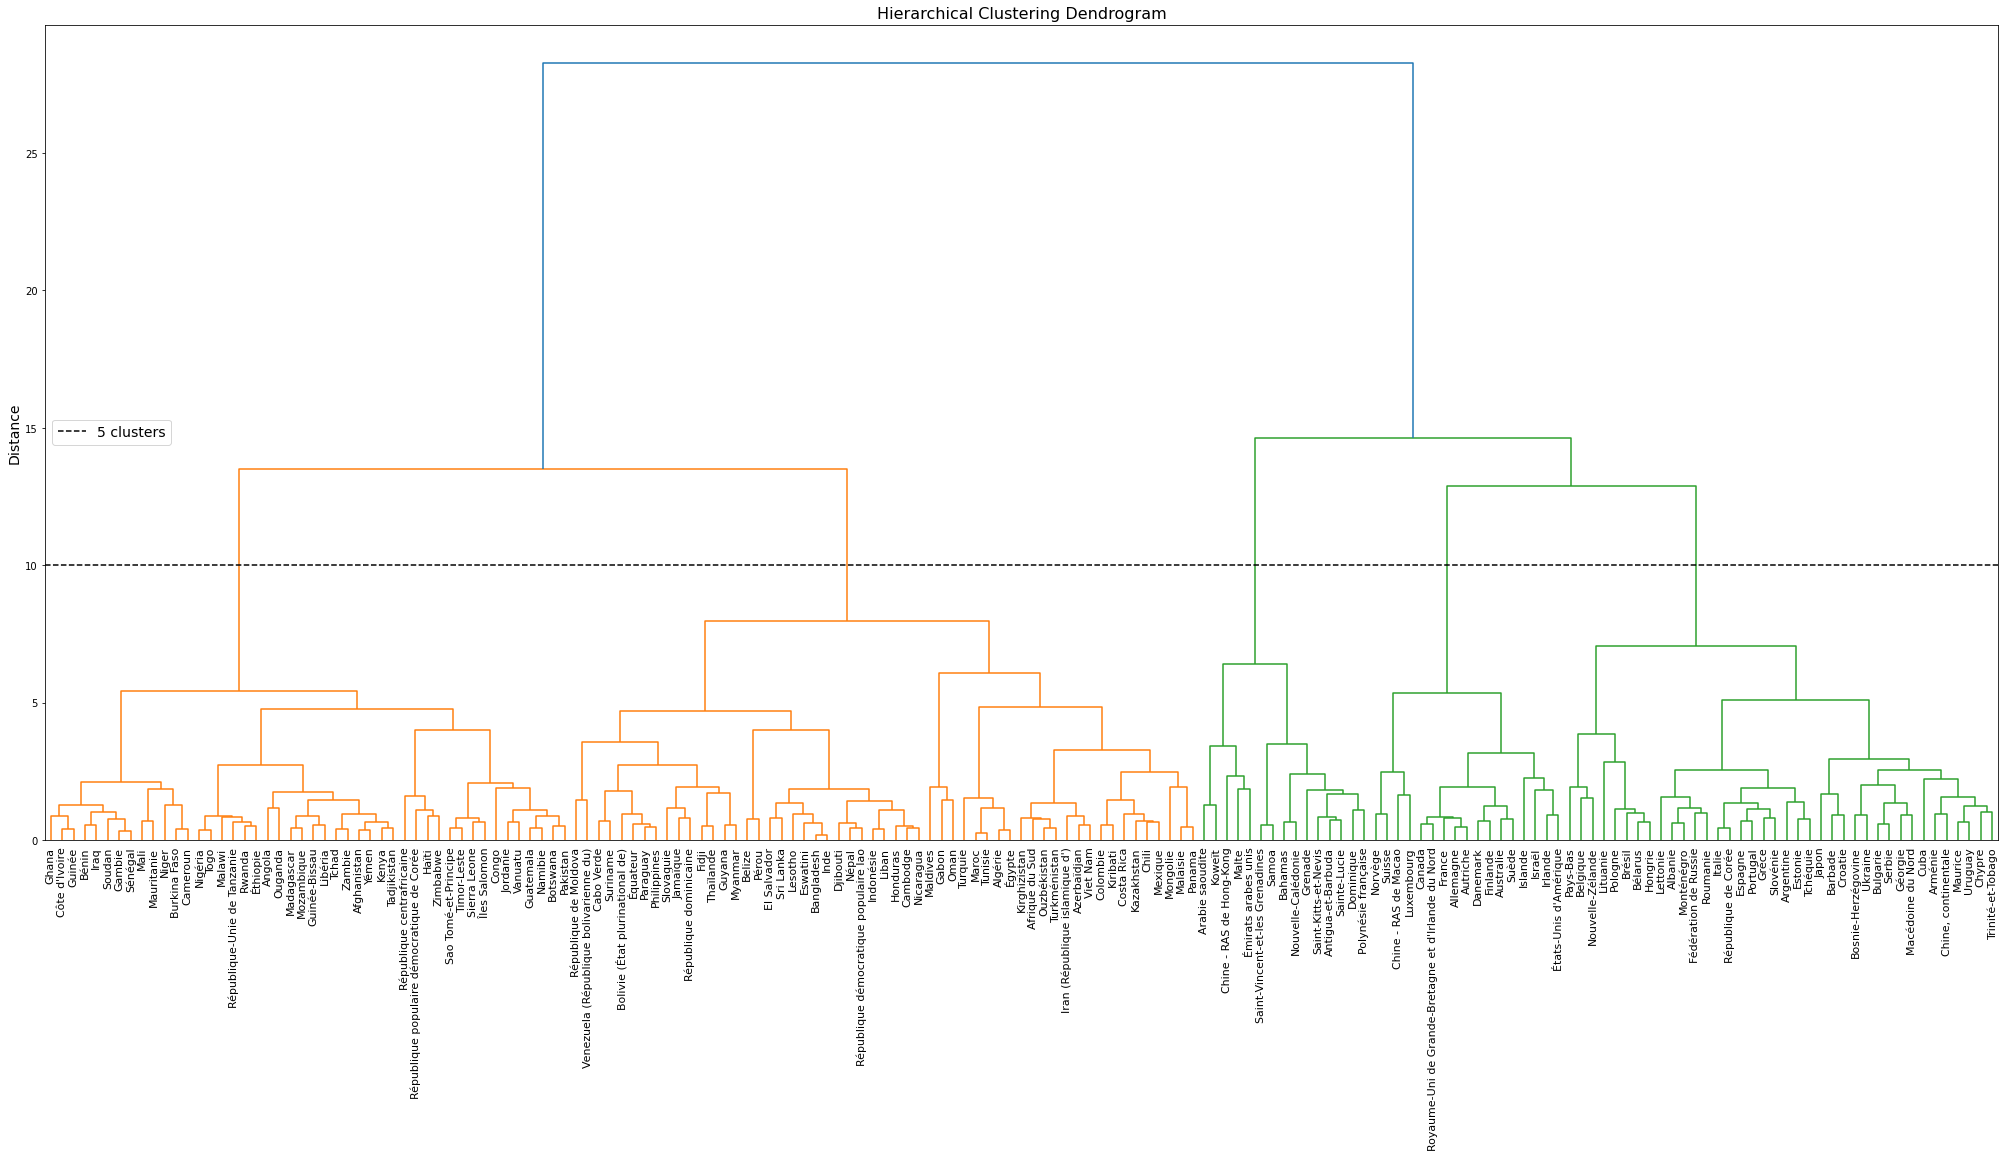

In [28]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing


# préparation des données pour le clustering
X = df_poulet.values
names = df_poulet.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X) 
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

Je réalise le découpage du dendrogramme en 5 clusters en choisissant des branches suffisamment éloignées de leurs noeuds.

### Clustering 

Je réalise le clustering afin de définir le groupe de chaque pays :

In [29]:
# Coupage du dendrogramme en 5 clusters
clusters = fcluster(Z,5, criterion='maxclust')
clusters=np.array(clusters)
clusters

array([1, 2, 5, 2, 4, 1, 3, 3, 5, 5, 4, 4, 2, 3, 2, 5, 5, 2, 2, 5, 1, 5,
       5, 1, 5, 1, 2, 2, 1, 4, 2, 3, 4, 5, 5, 2, 1, 2, 5, 5, 1, 4, 2, 3,
       2, 5, 5, 2, 2, 4, 4, 5, 2, 1, 1, 3, 5, 1, 1, 1, 2, 5, 1, 2, 5, 2,
       2, 2, 1, 4, 4, 4, 5, 2, 5, 1, 2, 1, 2, 2, 3, 2, 5, 2, 1, 5, 4, 5,
       1, 2, 1, 2, 1, 3, 2, 5, 1, 2, 2, 5, 1, 2, 1, 2, 1, 1, 4, 3, 5, 2,
       2, 1, 2, 1, 2, 2, 5, 2, 5, 3, 5, 2, 5, 4, 1, 1, 5, 2, 2, 2, 1, 1,
       3, 3, 3, 3, 1, 5, 1, 2, 5, 1, 2, 4, 2, 4, 1, 1, 1, 5, 2, 1, 1, 5,
       2, 2, 2, 5, 5, 1, 2, 2, 1, 1, 1, 2, 3, 2, 4, 1, 1], dtype=int32)

In [95]:
df_poulet["Cluster n°"]=clusters.tolist() # Ajout d'une colonne "Cluster n°" à mon df_poulet correspondant au groupe(cluster) de chaque pays
df_poulet.to_csv("df_poulet.csv",index_label=True)
df_poulet

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %),Diff pop_2017-2016 (en %),Autosuffisance (en kg/hab),PIB par habitant (en US$/hab),Cluster n°
Zone,,,,,,,
Afghanistan,2050.0,56.16,19.836182,2.515644,-0.798984,513.085978,1
Afrique du Sud,2935.0,83.64,42.192731,1.406970,-7.946008,6121.876572,2
Albanie,3390.0,118.17,54.226961,-0.078671,-6.934406,4514.204908,5
Algérie,3342.0,92.82,28.776126,2.024193,-0.169126,4109.701336,2
Allemagne,3542.0,104.06,60.320969,0.562122,0.266156,44552.061000,4
...,...,...,...,...,...,...,...
Émirats arabes unis,3343.0,112.95,45.630810,1.330455,-39.316119,40644.804043,3
Équateur,2599.0,66.46,46.403852,1.752986,0.000000,6213.501276,2
États-Unis d'Amérique,3779.0,113.24,64.729777,0.636376,11.609280,60116.568493,4


Je calcule à présent la position des centroïdes de chacun des groupes :

In [31]:
centroïdes=df_poulet.groupby("Cluster n°").mean().round(1)
centroïdes.to_csv("centroïdes.csv",index_label=True)
centroïdes

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %),Diff pop_2017-2016 (en %),Autosuffisance (en kg/hab),PIB par habitant (en US$/hab)
Cluster n°,,,,,,
1,2382.1,60.1,24.7,2.5,-2.5,1680.0
2,2816.7,77.1,39.8,1.3,-0.8,5565.7
3,2959.7,93.4,58.1,0.9,-42.8,21950.6
4,3490.0,112.1,62.0,0.9,-1.3,60468.1
5,3215.8,96.9,53.2,-0.0,3.5,17139.1


Les groupes 1 et 2 sont des pays dont la consommation de protéines est relativement faible et en particulier la consommation de proteines animales. 
De plus, leur autosuffisance en poulet est proche de zéro ce qui indique un besoin assez faible en importation de poulet. 
Enfin, le PIB par habitant étant assez faible ceci nous indique que ces pays sont généralement pauvres donc nous ne pourrons pas aligner nos prix d'exportation du poulet sur le niveau de vie local. 

Les groupes 4 et 5 sont des groupes qui consomment beaucoup de proteines animales et qui ont des revenus élevés voire très élevés. Toutefois, ils sont autosuffisants ou proches de l'autosuffisance pour la plupart ce qui indique un marché très concurrentiel et limité en terme part de marché.

Enfin, le groupe 3 montre des pays ayant une forte consommation de protéines animales, des revenus élevés et surtout une forte dépendance en matière de poulet. Tous ces indicateurs nous orientent donc vers ce cluster.

In [32]:
# Calcul du nombre de pays par cluster
nb_clusters=df_poulet.groupby("Cluster n°").agg({"Cluster n°":"count"})
nb_clusters

,Cluster n°
Cluster n°,
1,46
2,55
3,15
4,17
5,38


Je définie ma liste de pays à cibler en fonction du cluster n°3 choisi précédemment :

In [96]:
liste_pays=df_poulet.loc[df_poulet["Cluster n°"]==3]
liste_pays.to_csv("liste_pays.csv",index_label=True)
liste_pays

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %),Diff pop_2017-2016 (en %),Autosuffisance (en kg/hab),PIB par habitant (en US$/hab),Cluster n°
Zone,,,,,,,
Antigua-et-Barbuda,2447.0,80.43,64.291931,0.942091,-52.396621,15383.415188,3
Arabie saoudite,3300.0,88.57,38.636107,1.987035,-21.721281,20802.465306,3
Bahamas,2644.0,81.62,64.297966,1.001952,-34.053254,32719.152336,3
Chine - RAS de Hong-Kong,3270.0,135.91,73.291149,0.859256,-42.429009,46705.027813,3
Dominique,2973.0,82.08,57.882554,0.211313,-41.982703,7274.669503,3
Grenade,2364.0,72.03,57.337221,0.552880,-36.076988,10152.836673,3
Koweït,3444.0,100.42,48.107947,2.446291,-32.543584,29754.608017,3
Malte,3437.0,116.13,57.530354,0.419242,-18.267635,29205.178362,3
Nouvelle-Calédonie,2858.0,86.71,58.251643,1.067653,-32.473390,34128.634001,3


### ACP

L’objectif de l’Analyse en Composantes Principales(ACP) est de revenir à un espace de dimension réduite en déformant le moins possible la réalité. 

Il s’agit donc d’obtenir le résumé le plus pertinent des données initiales.


In [104]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing


# choix du nombre de composantes à calculer
n_comp =6

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_poulet[["Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)","Proportion de protéines animales (en %)","Diff pop_2017-2016 (en %)","Autosuffisance (en kg/hab)","PIB par habitant (en US$/hab)"]]

X = data_pca.values
names = df_poulet.index 
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)



PCA(n_components=6)

#### Eboulis des valeurs propres

La représentation des valeurs propres ( nouvelles variables) montre que les variables 1 et 2 expliquent 75% de la dispersion du nuage d'individus. Ceci est donc très satisfaisant au regard de l'objectif de l'ACP.

In [107]:
n = X.shape[0]
eigval = (n-1)/n*pca.explained_variance_
eigval

array([3.43647972, 1.05715142, 0.75719665, 0.42575384, 0.22423969,
       0.09917868])

On remarque que les deux premiers axes présentent des valeurs supérieures à 1.

On choisira donc ces deux axes pour expliquer l'inertie totale du nuage de points.

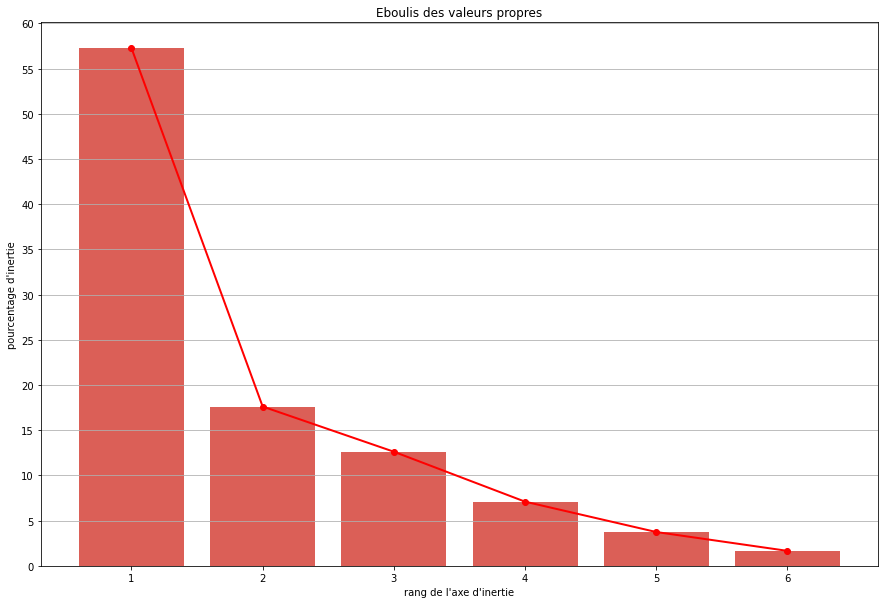

In [110]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

sing_vals = np.arange(n_comp) + 1

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(sing_vals, scree, 'ro-', linewidth=2)
    #plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.savefig("Eboulis.jpg", dpi=300,bbox_inches="tight" ,pad_inches=0.5)
    plt.show(block=False)

# Eboulis des valeurs propres
plt.figure(figsize = (15,10))
plt.grid(axis='y')
plt.yticks(np.arange(0,101,5))
display_scree_plot(pca)


#### Cercle des corrélations

Calculons la matrice des corrélations :

In [37]:
p = X.shape[1]
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations (variables x facteurs)
print(corvar)

[[ 0.88850606 -0.16708798  0.09349061  0.36236488 -0.03131739 -0.20398288]
 [ 0.92560511 -0.02566982  0.10944295  0.27099693  0.05124982  0.23356499]
 [ 0.86702322  0.20736106 -0.09556436 -0.27551754  0.34311865 -0.04999248]
 [-0.66159209  0.11529272  0.70555818  0.11334331  0.19516086 -0.01602132]
 [-0.02678413 -0.98452838  0.07008555 -0.13212837  0.08579463  0.01599611]
 [ 0.77468777  0.05465295  0.47394253 -0.33880919 -0.23969454 -0.00229179]]


In [38]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':data_pca.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                                                  id     COR_1     COR_2
0     Disponibilité alimentaire (Kcal/personne/jour)  0.888506 -0.167088
1  Disponibilité de protéines en quantité (g/pers...  0.925605 -0.025670
2            Proportion de protéines animales (en %)  0.867023  0.207361
3                          Diff pop_2017-2016 (en %) -0.661592  0.115293
4                         Autosuffisance (en kg/hab) -0.026784 -0.984528
5                      PIB par habitant (en US$/hab)  0.774688  0.054653


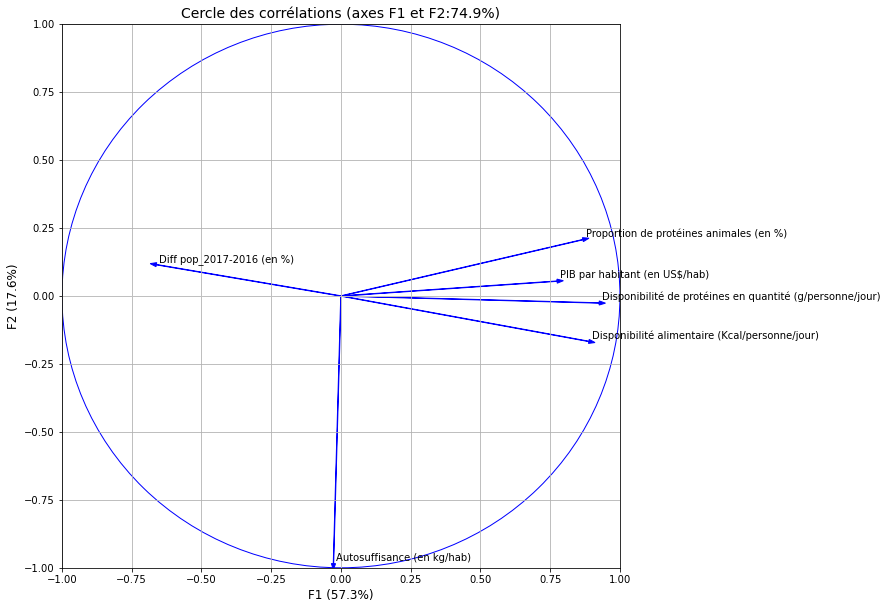

In [101]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(data_pca.columns[j],(corvar[j,0]+0.01,corvar[j,1]+0.01))
 plt.arrow(0,0,corvar[j,0],corvar[j,1], color="blue",head_width = 0.015,width = 0.0015)
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.grid(axis='both')
plt.xlabel("F1 (57.3%)", fontsize=12)
plt.ylabel("F2 (17.6%)", fontsize=12)
plt.title("Cercle des corrélations (axes F1 et F2:74.9%)", fontsize=14)
plt.savefig("Cercle des corrélations.jpg", dpi=300,bbox_inches="tight" ,pad_inches=0.5)

plt.show()

#### Projections des individus sur le 1er plan factoriel

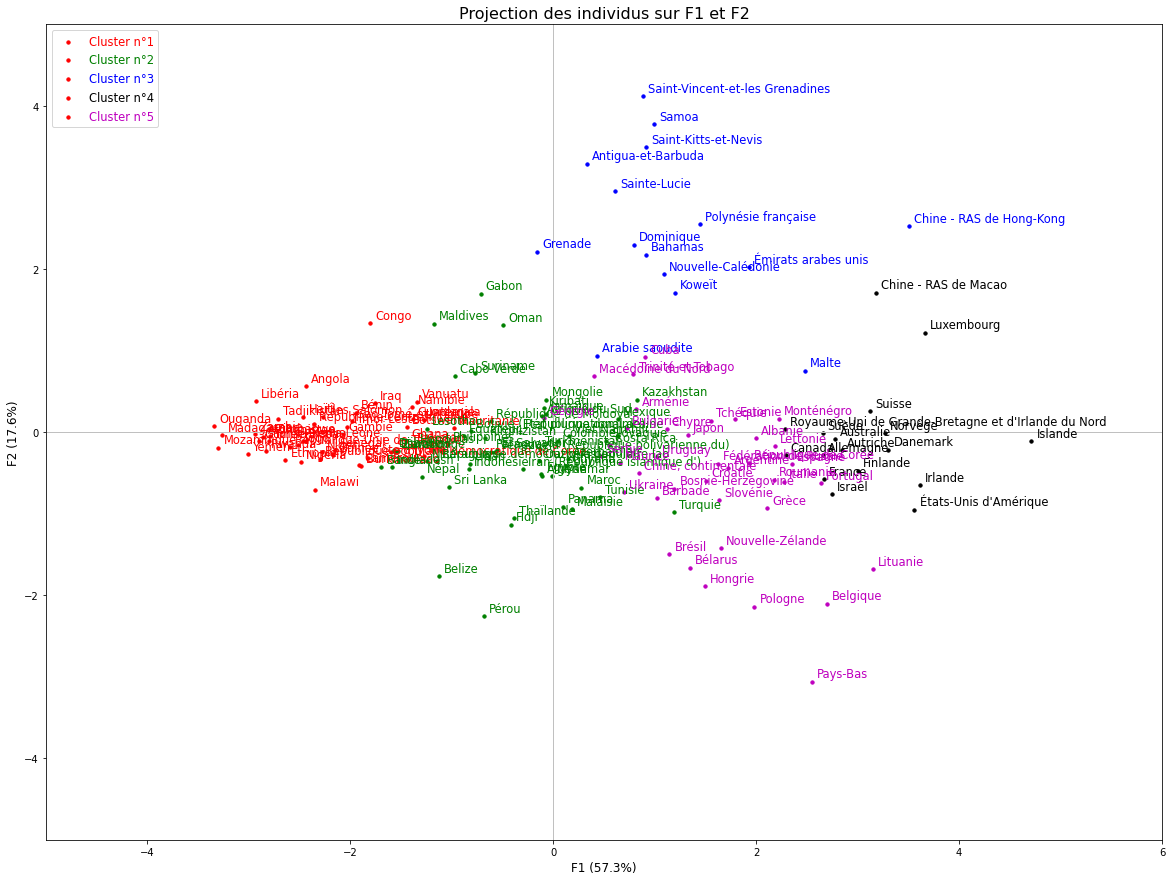

In [99]:
coord = pca.fit_transform(X_scaled)

#modalités de la variable qualitative
modalites = np.unique(clusters)

#liste des couleurs
couleurs = ['r','g','b','k','m']

#faire un graphique en coloriant les points
fig, ax = plt.subplots(figsize=(20,15))
ax.set_xlim(-5,6)
ax.set_ylim(-5,5)

#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):

 #numéro des individus concernés
    numero = np.where(clusters == modalites[c])     
   
 #les passer en revue pour affichage
    for i in numero[0]:
      plt.annotate(data_pca.index[i],(coord[i,0]+0.05,coord[i,1]+0.05),color=couleurs[c], size=11.5)
      plt.scatter(coord[i,0],coord[i,1],color=couleurs[c], s=11)
      plt.legend(["Cluster n°1","Cluster n°2","Cluster n°3","Cluster n°4","Cluster n°5"],labelcolor=couleurs, fontsize=11.5,loc="upper left")

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.xlabel("F1 (57.3%)", fontsize=12)
plt.ylabel("F2 (17.6%)", fontsize=12)

plt.title("Projection des individus sur F1 et F2", fontsize=16)
plt.savefig("Projection des individus sur F1 et F2.jpg", dpi=300)
plt.show()


## Seconde analyse: ajout d'une variable IDE(Investissement direct étranger) 

Afin d'afiner ma liste de pays à cibler, j'ai choisi d'ajouter une variable supplémentaire.

Cette variable, appelée "investissements directs étrangers(IDE)", est un bon indicateur de l'attractivité économique d'un pays. 
En effet, si on relève un taux élevé d'IDE, cela signifie que le pays séduit les investisseurs et qu'il est par conséquent attractif sur le plan économique. 

L'objectif avec les IDE est en premier de diminuer les coûts de production grâce à une fiscalité plus avantageuse ou encore grâce à la proximité de matières premières intéressantes. 

L'autre but des IDE est de s'implanter sur un nouveau marché. A ce titre, il sera donc judicieux d'utiliser cette variable pour réduire la liste de pays à cibler et de s'assurer de leur attractivité économique pour le développement à l'international de l'entreprise dans le futur .

### Préparation des données 

 Je sélectionne dans le dataframe "ide" les données issues de la variable IED(entrées totales) pour l'année 2017 :

In [50]:
ide=pd.read_csv("ide.csv", sep=",")
ide.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FDI,L’investissement Direct étranger (IDE),2,Afghanistan,6110,Valeur US $,23082,IED - entrées totales,2017,2017,millions,53.390000,X,Sources internationales sûres,UNCTAD
1,FDI,L’investissement Direct étranger (IDE),202,Afrique du Sud,6110,Valeur US $,23082,IED - entrées totales,2017,2017,millions,2008.360978,X,Sources internationales sûres,UNCTAD
2,FDI,L’investissement Direct étranger (IDE),3,Albanie,6110,Valeur US $,23082,IED - entrées totales,2017,2017,millions,1148.891224,X,Sources internationales sûres,INTRACEN UNCTAD
3,FDI,L’investissement Direct étranger (IDE),4,Algérie,6110,Valeur US $,23082,IED - entrées totales,2017,2017,millions,1232.341924,X,Sources internationales sûres,UNCTAD
4,FDI,L’investissement Direct étranger (IDE),79,Allemagne,6110,Valeur US $,23082,IED - entrées totales,2017,2017,millions,60353.749958,X,Sources internationales sûres,OECD UNCTAD


In [51]:
ide=ide.loc[:,["Zone","Valeur"]] # selection des colonnes Zone et Valeur pour l'exploitation de mes données
ide

,Zone,Valeur
0,Afghanistan,53.390000
1,Afrique du Sud,2008.360978
2,Albanie,1148.891224
3,Algérie,1232.341924
4,Allemagne,60353.749958
...,...,...
191,Venezuela (République bolivarienne du),-68.000000
192,Viet Nam,14100.000000
193,Yémen,-269.850000
194,Zambie,1107.500000


Je récupère les données du dataframe "pop1" pour l'année 2017 :

In [52]:
pop1=pop.loc[:,["Zone",2017]]
pop1

Année,Zone,2017
0,Afghanistan,36296.113
1,Afrique du Sud,57009.756
2,Albanie,2884.169
3,Algérie,41389.189
4,Allemagne,82658.409
...,...,...
231,Îles Salomon,636.039
232,Îles Turques-et-Caïques,37.115
233,Îles Vierges américaines,104.751
234,Îles Vierges britanniques,29.577


In [53]:
ide["Valeur (en milliers de US$)"]=ide["Valeur"]*1000 # création d'une colonne de valeur en milliers de US$
ide=ide.loc[:,["Zone","Valeur (en milliers de US$)"]] # selection des colonnes Zone et Valeur
ide

,Zone,Valeur (en milliers de US$)
0,Afghanistan,5.339000e+04
1,Afrique du Sud,2.008361e+06
2,Albanie,1.148891e+06
3,Algérie,1.232342e+06
4,Allemagne,6.035375e+07
...,...,...
191,Venezuela (République bolivarienne du),-6.800000e+04
192,Viet Nam,1.410000e+07
193,Yémen,-2.698500e+05
194,Zambie,1.107500e+06


In [54]:
pop1=pop1.rename(columns={2017:"pop en 2017(en milliers d'hab)"}) # renommage de la colonne "2017"
pop1

Année,Zone,pop en 2017(en milliers d'hab)
0,Afghanistan,36296.113
1,Afrique du Sud,57009.756
2,Albanie,2884.169
3,Algérie,41389.189
4,Allemagne,82658.409
...,...,...
231,Îles Salomon,636.039
232,Îles Turques-et-Caïques,37.115
233,Îles Vierges américaines,104.751
234,Îles Vierges britanniques,29.577


In [55]:
pib_total=pd.merge(pib.reset_index(),pop1, on=['Zone'], how='inner') # fusion du dataframe "pib" et "pop1"
pib_total

,index,Zone,PIB par habitant (en US$/hab),pop en 2017(en milliers d'hab)
0,0,Afghanistan,513.085978,36296.113
1,1,Afrique du Sud,6121.876572,57009.756
2,2,Albanie,4514.204908,2884.169
3,3,Algérie,4109.701336,41389.189
4,4,Allemagne,44552.061000,82658.409
...,...,...,...,...
204,206,Venezuela (République bolivarienne du),8429.074575,29402.484
205,207,Viet Nam,2365.521494,94600.648
206,208,Yémen,745.087909,27834.819
207,209,Zambie,1534.874627,16853.599


In [56]:
pib_total["PIB (en milliards de US$)"]=pib_total["PIB par habitant (en US$/hab)"]*pib_total["pop en 2017(en milliers d'hab)"]/1000000
pib_total=pib_total.loc[:,["Zone","PIB (en milliards de US$)"]]
pib_total # nouveau dataframe "pib_total" 

,Zone,PIB (en milliards de US$)
0,Afghanistan,18.623027
1,Afrique du Sud,349.006690
2,Albanie,13.019730
3,Algérie,170.097205
4,Allemagne,3682.602480
...,...,...
204,Venezuela (République bolivarienne du),247.835730
205,Viet Nam,223.779866
206,Yémen,20.739387
207,Zambie,25.868161


In [57]:
ide=pd.merge(ide.reset_index(),pib_total, on=['Zone'], how='inner') # fusion du dataframe "ide" et "pib_total"
ide

,index,Zone,Valeur (en milliers de US$),PIB (en milliards de US$)
0,0,Afghanistan,5.339000e+04,18.623027
1,1,Afrique du Sud,2.008361e+06,349.006690
2,2,Albanie,1.148891e+06,13.019730
3,3,Algérie,1.232342e+06,170.097205
4,4,Allemagne,6.035375e+07,3682.602480
...,...,...,...,...
190,191,Venezuela (République bolivarienne du),-6.800000e+04,247.835730
191,192,Viet Nam,1.410000e+07,223.779866
192,193,Yémen,-2.698500e+05,20.739387
193,194,Zambie,1.107500e+06,25.868161


In [58]:
ide["ide (en % du PIB)"]=(ide["Valeur (en milliers de US$)"]*1000)/(ide["PIB (en milliards de US$)"]*1000000000)*100
ide=ide.loc[:,["Zone","ide (en % du PIB)"]] # Création d'une noiuvelle colonne représentant l'ide en % du PIB et selection des colonnes "Zone" et "ide (en % du PIB)"
ide

,Zone,ide (en % du PIB)
0,Afghanistan,0.286688
1,Afrique du Sud,0.575451
2,Albanie,8.824232
3,Algérie,0.724493
4,Allemagne,1.638889
...,...,...
190,Venezuela (République bolivarienne du),-0.027438
191,Viet Nam,6.300835
192,Yémen,-1.301147
193,Zambie,4.281325


In [59]:
ide.drop(ide.loc[ide["Zone"]=="Chine"].index, inplace=True) # suppression de la Chine
ide

,Zone,ide (en % du PIB)
0,Afghanistan,0.286688
1,Afrique du Sud,0.575451
2,Albanie,8.824232
3,Algérie,0.724493
4,Allemagne,1.638889
...,...,...
190,Venezuela (République bolivarienne du),-0.027438
191,Viet Nam,6.300835
192,Yémen,-1.301147
193,Zambie,4.281325


### Liste des pays à cibler

Grâce à mon dataframe "ide",j'affine ma liste de pays à cibler en utilisant la valeur de l'ide (en % du PIB) pour discriminer mes pays.  

In [60]:
liste_pays_finale=pd.merge(liste_pays.reset_index(),ide, on=['Zone'], how='inner').set_index("Zone") # Création de ma liste de pays finale
liste_pays_finale

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %),Diff pop_2017-2016 (en %),Autosuffisance (en kg/hab),PIB par habitant (en US$/hab),Cluster n°,ide (en % du PIB)
Zone,,,,,,,,
Antigua-et-Barbuda,2447.0,80.43,64.291931,0.942091,-52.396621,15383.415188,3,7.693350
Arabie saoudite,3300.0,88.57,38.636107,1.987035,-21.721281,20802.465306,3,0.206074
Bahamas,2644.0,81.62,64.297966,1.001952,-34.053254,32719.152336,3,7.216953
Chine - RAS de Hong-Kong,3270.0,135.91,73.291149,0.859256,-42.429009,46705.027813,3,32.435782
Dominique,2973.0,82.08,57.882554,0.211313,-41.982703,7274.669503,3,-0.406327
Grenade,2364.0,72.03,57.337221,0.552880,-36.076988,10152.836673,3,9.920242
Koweït,3444.0,100.42,48.107947,2.446291,-32.543584,29754.608017,3,0.288449
Malte,3437.0,116.13,57.530354,0.419242,-18.267635,29205.178362,3,26.640449
Nouvelle-Calédonie,2858.0,86.71,58.251643,1.067653,-32.473390,34128.634001,3,5.232711


In [61]:
liste_pays_finale.drop(liste_pays_finale.loc[liste_pays_finale['ide (en % du PIB)']<2].index,inplace=True) # Suppression des pays dont l'"ide (en % du PIB)" est inférieur à 2
liste_pays_finale = liste_pays_finale[['Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Proportion de protéines animales (en %)','Diff pop_2017-2016 (en %)','Autosuffisance (en kg/hab)','PIB par habitant (en US$/hab)','ide (en % du PIB)','Cluster n°']]
liste_pays_finale.to_csv("liste_pays_finale.csv",index_label=True)
liste_pays_finale

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %),Diff pop_2017-2016 (en %),Autosuffisance (en kg/hab),PIB par habitant (en US$/hab),ide (en % du PIB),Cluster n°
Zone,,,,,,,,
Antigua-et-Barbuda,2447.0,80.43,64.291931,0.942091,-52.396621,15383.415188,7.693350,3
Bahamas,2644.0,81.62,64.297966,1.001952,-34.053254,32719.152336,7.216953,3
Chine - RAS de Hong-Kong,3270.0,135.91,73.291149,0.859256,-42.429009,46705.027813,32.435782,3
Grenade,2364.0,72.03,57.337221,0.552880,-36.076988,10152.836673,9.920242,3
Malte,3437.0,116.13,57.530354,0.419242,-18.267635,29205.178362,26.640449,3
Nouvelle-Calédonie,2858.0,86.71,58.251643,1.067653,-32.473390,34128.634001,5.232711,3
Saint-Kitts-et-Nevis,2744.0,85.11,65.021737,0.806994,-57.642425,19155.431731,5.108350,3
Saint-Vincent-et-les Grenadines,2972.0,89.33,55.446099,0.335072,-72.841833,7212.960181,12.388587,3
Sainte-Lucie,2638.0,86.04,60.588099,0.513943,-49.736397,11047.497645,6.554430,3


# Tests statistiques

## Tests d'adéquation de Kolmogorov Smirnov

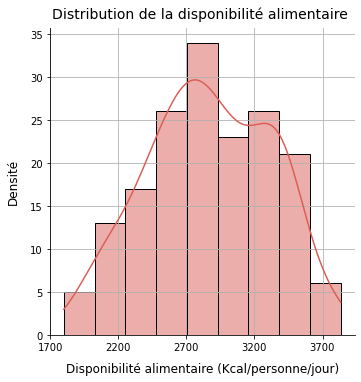

In [62]:
from matplotlib import pyplot as plt
import seaborn  as sns
import numpy as np

palette=sns.color_palette("hls", 2)
sns.set_palette(palette)
sns.displot(df_poulet["Disponibilité alimentaire (Kcal/personne/jour)"], kde=True) 
plt.xticks(np.arange(1700,4000,500))
plt.xlabel("Disponibilité alimentaire (Kcal/personne/jour)", fontsize=12, labelpad=10)
plt.ylabel('Densité', fontsize=12, labelpad=10)
plt.grid("both")
plt.title("Distribution de la disponibilité alimentaire ", fontsize=14, pad=10)
plt.show()

Afin de tester l'adéquation des variable du dataframe df_poulet à une loi normale, on réalise un test de Kolmogorv Smirnov.

On émet l'hypothèse H0 selon laquelle la variable suit une loi normale.

On vérifie ensuite la statistique de test et la p-value.

In [63]:
from scipy.stats import ks_2samp

#Test de  Kolmogorov-Smirnov sur variable "Disponibilité alimentaire (Kcal/personne/jour)"
ks_2samp(df_poulet["Disponibilité alimentaire (Kcal/personne/jour)"],list(np.random.normal(np.mean(df_poulet["Disponibilité alimentaire (Kcal/personne/jour)"]), np.std(df_poulet["Disponibilité alimentaire (Kcal/personne/jour)"]),1000)))

KstestResult(statistic=0.0921578947368421, pvalue=0.15603533161252003)

Au vu de la statistique de test et de la p-value, on ne peut pas rejetter l’hypothèse H0 de normalité au niveau de test 5%.

In [64]:
#Test de  Kolmogorov-Smirnov sur variable "Disponibilité de protéines en quantité (g/personne/jour)"
ks_2samp(df_poulet["Disponibilité de protéines en quantité (g/personne/jour)"],list(np.random.normal(np.mean(df_poulet["Disponibilité de protéines en quantité (g/personne/jour)"]), np.std(df_poulet["Disponibilité de protéines en quantité (g/personne/jour)"]),1000)))

KstestResult(statistic=0.06694152046783626, pvalue=0.505489975442009)

Au vu de la statistique de test et de la p-value, on ne peut pas rejetter l’hypothèse H0 de normalité au niveau de test 5%.

In [65]:
#Test de  Kolmogorov-Smirnov sur variable "Proportion de protéines animales (en %)"
ks_2samp(df_poulet["Proportion de protéines animales (en %)"],list(np.random.normal(np.mean(df_poulet["Proportion de protéines animales (en %)"]), np.std(df_poulet["Proportion de protéines animales (en %)"]),1000)))

KstestResult(statistic=0.09287719298245614, pvalue=0.15000723285305284)

Au vu de la statistique de test et de la p-value, on ne peut pas rejetter l’hypothèse H0 de normalité au niveau de test 5%.


In [66]:
#Test de  Kolmogorov-Smirnov sur variable "Diff pop_2017-2016 (en %)"
ks_2samp(df_poulet["Diff pop_2017-2016 (en %)"],list(np.random.normal(np.mean(df_poulet["Diff pop_2017-2016 (en %)"]),np.std(df_poulet["Diff pop_2017-2016 (en %)"]),1000)))

KstestResult(statistic=0.06637426900584795, pvalue=0.5163468152656993)

Au vu de la statistique de test et de la p-value, on ne peut pas rejetter l’hypothèse H0 de normalité au niveau de test 5%.


L'ensemble des 4 variables testées ci-dessus suivent une loi normale.

## Test de comparaison de 2 populations

Je choisie mes deux clusters pour réaliser un test de comparaison sur ma variable gaussienne "Disponibilité de protéines en quantité (g/personne/jour)" :

In [67]:
Cluster_1=df_poulet.loc[df_poulet["Cluster n°"]==1]
Cluster_1.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %),Diff pop_2017-2016 (en %),Autosuffisance (en kg/hab),PIB par habitant (en US$/hab),Cluster n°
Zone,,,,,,,
Afghanistan,2050.0,56.16,19.836182,2.515644,-0.798984,513.085978,1
Angola,2372.0,52.02,31.353326,3.267548,-9.290075,4095.811686,1
Botswana,2341.0,64.65,40.077340,2.047681,-0.906997,7893.388428,1
Burkina Faso,2721.0,77.67,14.381357,2.849322,0.000000,734.996282,1
Bénin,2757.0,64.23,20.270901,2.712569,-9.843226,1136.593360,1


In [68]:
Cluster_2=df_poulet.loc[df_poulet["Cluster n°"]==2]
Cluster_2.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines animales (en %),Diff pop_2017-2016 (en %),Autosuffisance (en kg/hab),PIB par habitant (en US$/hab),Cluster n°
Zone,,,,,,,
Afrique du Sud,2935.0,83.64,42.192731,1.406970,-7.946008,6121.876572,2
Algérie,3342.0,92.82,28.776126,2.024193,-0.169126,4109.701336,2
Azerbaïdjan,3137.0,92.41,35.028677,1.109939,-2.539278,4150.868844,2
Bangladesh,2562.0,60.68,20.731707,1.069773,-0.050098,1538.233627,2
Belize,2712.0,66.71,37.685504,1.961045,26.612094,4887.559820,2


On souhaite comparer deux échantillons gaussiens, pour cela il nous suffit de comparer leur moyenne μ1 et μ2, et leur variance σ1 et σ2.

On réalise d'abord un test d'égalité des variances puis un test d'égalité des moyennes.

### Test dégalité des variances : test de Barlett 

On réalise un test de Barlett pour comparer les variances des deux clusters.

Pour cela, on emet l'hypothèse H0 selon laquelle les variances sont égales.

In [69]:
from scipy.stats import bartlett

bartlett(Cluster_1["Disponibilité de protéines en quantité (g/personne/jour)"],Cluster_2["Disponibilité de protéines en quantité (g/personne/jour)"])

BartlettResult(statistic=1.965032083940408, pvalue=0.1609761670678058)

On ne rejette pas l'hypothèse H0 au niveau de test 5% puisque la p-value vaut 0.161

### Test d'égalité des moyennes : Test de Student

On réalise un test de Student pour comparer les moyennes des deux clusters.

Pour cela, on emet l'hypothèse H0 selon laquelle les moyennes sont égales.

In [70]:
from scipy.stats import ttest_ind


ttest_ind(Cluster_1["Disponibilité de protéines en quantité (g/personne/jour)"],Cluster_2["Disponibilité de protéines en quantité (g/personne/jour)"], equal_var=True)


Ttest_indResult(statistic=-7.266128716651409, pvalue=8.631672247860604e-11)

On obtient une p-valeur égale à environ 8.63×10−11. On constate donc que l’hypothèse d’égalité des  moyennes de "Disponibilité de protéines en quantité" est rejetée à un niveau de test de 5%.

On rejette donc que la "Disponibilité de protéines en quantité"  des clusters 1 et 2  suivent la même distribution car on a rejeté l’hypothèse d’égalité des moyennes.